In [1]:
import importlib
import xarray as xr
import numpy as np
import sys
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import colors
import pandas as pd
from math import nan
import math
from glob import glob
import datetime as dt

from CASutils import mapplot_utils as maps
from CASutils import filter_utils as filt 

from cmocean import cm as cmo
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

importlib.reload(maps)
importlib.reload(filt)

<module 'CASutils.filter_utils' from '/home/dhruv/CASanalysis/CASutils/filter_utils.py'>

In [2]:
ps_files = ["/home/data/ERA5/PS_day/ps_{}.nc".format(i) for i in range(1979, 2020)]
ps = xr.open_mfdataset(ps_files)

In [3]:
ps

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288, time: 14975)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2019-12-31
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
Data variables:
    ps       (time, lat, lon) float64 dask.array<chunksize=(365, 192, 288), meta=np.ndarray>

In [8]:
def plot_climatology(x, show_ocean=True, limits=False, lmin=None, lmax=None, 
                     cmap=cmo.thermal, title_flag=False, title=""):
    avg = x.mean('time')
    fig = plt.figure(figsize=(12,8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    
    if(limits):
        avg.plot(ax=ax, vmin=lmin, vmax=lmax, cbar_kwargs={'shrink':0.5}, cmap=cmap, levels=np.linspace(lmin,lmax,11))
    else:
        avg.plot(ax=ax, vmin=lmin, vmax=lmax, cbar_kwargs={'shrink':0.5}, cmap=cmap)
    
    if show_ocean == False:
        ax.add_feature(cfeature.OCEAN, zorder=100, color='w')
    
    plt.title(title)

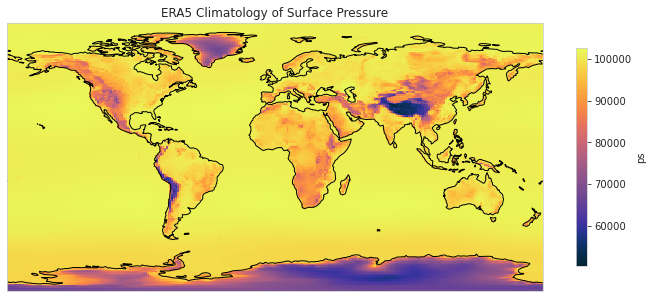

In [9]:
plot_climatology(ps.ps, title="ERA5 Climatology of Surface Pressure")

In [181]:
ha1 = xr.open_dataset("/home/dhruv/fluxnet/US-Ha1.nc")
wcr = xr.open_dataset("/home/dhruv/fluxnet/US-WCr.nc")
blo = xr.open_dataset("/home/dhruv/fluxnet/US-Blo.nc")
srm = xr.open_dataset("/home/dhruv/fluxnet/US-SRM.nc")

In [167]:
ps.ps.sel(dict(lat=ha1.lat, lon=(ha1.lon+360)), method='nearest').mean().load()

<xarray.DataArray 'ps' ()>
array(98041.0655085)
Coordinates:
    lon      float64 287.5
    lat      float64 42.88

In [168]:
ps.ps.sel(dict(lat=wcr.lat, lon=(wcr.lon+360)), method='nearest').mean().load()

<xarray.DataArray 'ps' ()>
array(95813.50834528)
Coordinates:
    lon      float64 270.0
    lat      float64 45.71

In [169]:
ps.ps.sel(dict(lat=blo.lat, lon=(blo.lon+360)), method='nearest').mean().load()

<xarray.DataArray 'ps' ()>
array(98004.23389231)
Coordinates:
    lon      float64 238.8
    lat      float64 39.11

In [182]:
ps.ps.sel(dict(lat=srm.lat, lon=(srm.lon+360)), method='nearest').mean().load()

<xarray.DataArray 'ps' ()>
array(88812.52691593)
Coordinates:
    lon      float64 248.8
    lat      float64 31.57

In [84]:
temp_files_1000 = glob("/home/data/ERA5/T_day/T_day_1000mb/*.nc")
temp_files_975 = glob("/home/data/ERA5/T_day/T_day_975mb/*.nc")
temp_files_950 = glob("/home/data/ERA5/T_day/T_day_950mb/*.nc")
temp_files_925 = glob("/home/data/ERA5/T_day/T_day_925mb/*.nc")
temp_files_900 = glob("/home/data/ERA5/T_day/T_day_900mb/*.nc")
temp_files_875 = glob("/home/data/ERA5/T_day/T_day_875mb/*.nc")
temp_files_850 = glob("/home/data/ERA5/T_day/T_day_850mb/*.nc")
# temp = xr.open_mfdataset(temp_files).load()

In [146]:
for i in temp_files_1000:
    temp = xr.open_dataset(i)
    year = i[-14:-10]
    num_days = len(temp.time)
    times = pd.date_range("{}-01-01".format(year), periods=num_days)
    temp['time'] = times
    name = i[-16:]
    temp.to_netcdf("/home/dhruv/data/temp_ps/ps_1000/" + name)
    
for i in temp_files_975:
    temp = xr.open_dataset(i)
    year = i[-13:-9]
    num_days = len(temp.time)
    times = pd.date_range("{}-01-01".format(year), periods=num_days)
    temp['time'] = times
    name = i[-15:]
    temp.to_netcdf("/home/dhruv/data/temp_ps/ps_975/" + name)
    
for i in temp_files_950:
    temp = xr.open_dataset(i)
    year = i[-13:-9]
    num_days = len(temp.time)
    times = pd.date_range("{}-01-01".format(year), periods=num_days)
    temp['time'] = times
    name = i[-15:]
    temp.to_netcdf("/home/dhruv/data/temp_ps/ps_950/" + name)
    
for i in temp_files_925:
    temp = xr.open_dataset(i)
    year = i[-13:-9]
    num_days = len(temp.time)
    times = pd.date_range("{}-01-01".format(year), periods=num_days)
    temp['time'] = times
    name = i[-15:]
    temp.to_netcdf("/home/dhruv/data/temp_ps/ps_925/" + name)
    
for i in temp_files_900:
    temp = xr.open_dataset(i)
    year = i[-13:-9]
    num_days = len(temp.time)
    times = pd.date_range("{}-01-01".format(year), periods=num_days)
    temp['time'] = times
    name = i[-15:]
    temp.to_netcdf("/home/dhruv/data/temp_ps/ps_900/" + name)
    
for i in temp_files_875:
    temp = xr.open_dataset(i)
    year = i[-13:-9]
    num_days = len(temp.time)
    times = pd.date_range("{}-01-01".format(year), periods=num_days)
    temp['time'] = times
    name = i[-15:]
    temp.to_netcdf("/home/dhruv/data/temp_ps/ps_875/" + name)
    
for i in temp_files_850:
    temp = xr.open_dataset(i)
    year = i[-13:-9]
    num_days = len(temp.time)
    times = pd.date_range("{}-01-01".format(year), periods=num_days)
    temp['time'] = times
    name = i[-15:]
    temp.to_netcdf("/home/dhruv/data/temp_ps/ps_850/" + name)

In [147]:
t1000_files = glob("/home/dhruv/data/temp_ps/ps_1000/*.nc")
t_1000 = xr.open_mfdataset(t1000_files)

t975_files = glob("/home/dhruv/data/temp_ps/ps_975/*.nc")
t_975 = xr.open_mfdataset(t975_files)

t950_files = glob("/home/dhruv/data/temp_ps/ps_950/*.nc")
t_950 = xr.open_mfdataset(t950_files)

t925_files = glob("/home/dhruv/data/temp_ps/ps_925/*.nc")
t_925 = xr.open_mfdataset(t925_files)

t900_files = glob("/home/dhruv/data/temp_ps/ps_900/*.nc")
t_900 = xr.open_mfdataset(t900_files)

t875_files = glob("/home/dhruv/data/temp_ps/ps_875/*.nc")
t_875 = xr.open_mfdataset(t875_files)

t850_files = glob("/home/dhruv/data/temp_ps/ps_850/*.nc")
t_850 = xr.open_mfdataset(t850_files)

In [191]:
t_1000

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288, time: 15341)
Coordinates:
    level    float64 1e+03
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2020-12-31
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
Data variables:
    T        (time, lat, lon) float64 dask.array<chunksize=(365, 192, 288), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [91]:
def jja_std_anoms(data):
    data = data.sel(time=~((data.time.dt.month==2) & (data.time.dt.day == 29)))
    daystr = xr.DataArray(data.indexes['time'].strftime('%m-%d'), coords = data.time.coords, name="daystr")
    datseason = data.groupby(daystr).mean('time')
    harmonics = filt.calc_season_nharm(datseason, 4, dimtime=0)
    anoms = data.groupby(daystr)-harmonics
    jja_std = anoms.sel(time=anoms['time.season']=='JJA').std()
    std_anoms = anoms/jja_std
    return std_anoms

In [92]:
def remove_time_mean(x):
    return(x - x.mean(dim='time'))

def remove_annual_cycle(x):
#     return((x-x.groupby('time.month').mean()).drop('month'))
    return x.groupby('time.year').map(remove_time_mean)

In [93]:
t2m_files = ["/home/data/ERA5/day/T2m_day/t2m_{}.nc".format(i) for i in range(1979, 2020)]
t2m = xr.open_mfdataset(t2m_files).load()

In [174]:
lat, lon = wcr.lat.item(), wcr.lon.item() # using US-WCr
t2m_data = t2m.t2m.sel(dict(lat=lat, lon=(lon+360)), method='nearest')
t2m_anoms = remove_annual_cycle(jja_std_anoms(t2m_data))
jja_t2m_anoms = t2m_anoms.sel(time=t2m_anoms['time.season']=='JJA')
heatwave_days = jja_t2m_anoms[jja_t2m_anoms>=jja_t2m_anoms.quantile(0.90)].time.values

In [175]:
vert_profile = []
vert_profile.append(t_1000.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())
vert_profile.append(t_975.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())
vert_profile.append(t_950.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())
vert_profile.append(t_925.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())
vert_profile.append(t_900.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())
vert_profile.append(t_875.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())
vert_profile.append(t_850.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())

Text(0.5, 1.0, 'US-WCr')

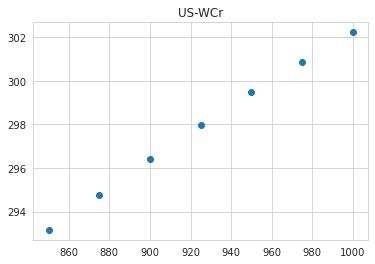

In [190]:
pressure_levels = np.arange(850, 1025, 25)[::-1]
plt.scatter(pressure_levels, vert_profile)
plt.title("US-WCr")

In [177]:
lat, lon = ha1.lat.item(), ha1.lon.item() # using US-Ha1
t2m_data = t2m.t2m.sel(dict(lat=lat, lon=(lon+360)), method='nearest')
t2m_anoms = remove_annual_cycle(jja_std_anoms(t2m_data))
jja_t2m_anoms = t2m_anoms.sel(time=t2m_anoms['time.season']=='JJA')
heatwave_days = jja_t2m_anoms[jja_t2m_anoms>=jja_t2m_anoms.quantile(0.90)].time.values

In [178]:
vert_profile = []
vert_profile.append(t_1000.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())
vert_profile.append(t_975.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())
vert_profile.append(t_950.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())
vert_profile.append(t_925.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())
vert_profile.append(t_900.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())
vert_profile.append(t_875.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())
vert_profile.append(t_850.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())

In [179]:
t2m_data

<xarray.DataArray 't2m' (time: 14975)>
array([278.60327661, 281.11505627, 268.6394898 , ..., 273.67281115,
       272.91290302, 273.22030546])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2019-12-31
    lon      float64 287.5
    lat      float64 42.88
Attributes:
    regrid_method:  bilinear

Text(0.5, 1.0, 'US-Ha1')

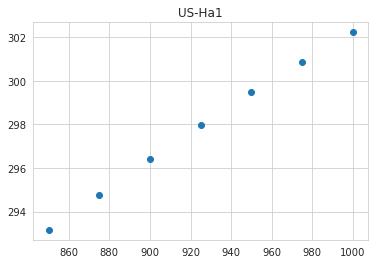

In [192]:
plt.scatter(pressure_levels, vert_profile)
plt.title("US-Ha1")

In [183]:
lat, lon = blo.lat.item(), blo.lon.item() # using US-Blo
t2m_data = t2m.t2m.sel(dict(lat=lat, lon=(lon+360)), method='nearest')
t2m_anoms = remove_annual_cycle(jja_std_anoms(t2m_data))
jja_t2m_anoms = t2m_anoms.sel(time=t2m_anoms['time.season']=='JJA')
heatwave_days = jja_t2m_anoms[jja_t2m_anoms>=jja_t2m_anoms.quantile(0.90)].time.values

In [184]:
vert_profile = []
vert_profile.append(t_1000.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())
vert_profile.append(t_975.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())
vert_profile.append(t_950.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())
vert_profile.append(t_925.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())
vert_profile.append(t_900.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())
vert_profile.append(t_875.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())
vert_profile.append(t_850.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())

Text(0.5, 1.0, 'US-Blo')

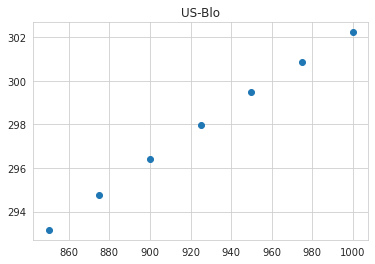

In [193]:
plt.scatter(pressure_levels, vert_profile)
plt.title("US-Blo")

Some point over Louisiana which is flat and has positive sensible heat anomalies

In [187]:
lat, lon = 30.53, -93.26 
t2m_data = t2m.t2m.sel(dict(lat=lat, lon=(lon+360)), method='nearest')
t2m_anoms = remove_annual_cycle(jja_std_anoms(t2m_data))
jja_t2m_anoms = t2m_anoms.sel(time=t2m_anoms['time.season']=='JJA')
heatwave_days = jja_t2m_anoms[jja_t2m_anoms>=jja_t2m_anoms.quantile(0.90)].time.values

In [188]:
vert_profile = []
vert_profile.append(t_1000.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())
vert_profile.append(t_975.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())
vert_profile.append(t_950.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())
vert_profile.append(t_925.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())
vert_profile.append(t_900.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())
vert_profile.append(t_875.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())
vert_profile.append(t_850.T.sel(dict(lat=lat, lon=(lon+360)), 
                                 method='nearest').sel(time=heatwave_days).mean().compute().item())

Text(0.5, 1.0, 'Flat place in Louisiana with +ve SHFLX anomalies')

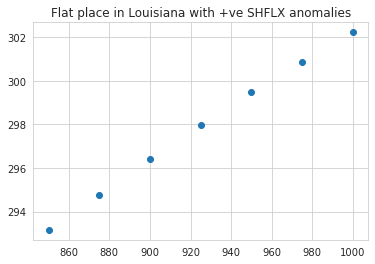

In [194]:
plt.scatter(pressure_levels, vert_profile)
plt.title("Flat place in Louisiana with +ve SHFLX anomalies")